# Air Quality Benefits of Emissions Testing Capstone: Data Analysis

## ----Project Context (Re-Stated from Part I) ----

In 2017 The Pennsylvania legislature was deciding whether to continue emissions testing in the state, and which test(s) to use if emissions testing was to continue.

As part of a capstone project, I was part of a team that had a goal of using data to determine benefits of emissions testing and inform public policy descisions in PA. The data at our disposal consisted of emissions test results from Colorado over the span of 2010-2016.

With the provided data, the team sought to investigate the following questions as the overall project goal:

- How can the emissions inspection results/data inform us about actual vehicle emissions over time?
- How does a particular model year’s emissions change over time?
- What amount of emissions are we preventing from entering the environment by testing?

### Summary of Results

#### --- Question 1: How can the emissions inspection results/data inform us about actual vehicle emissions over time? --

#### --- How does a particular model year’s emissions change over time?

#### --- What amount of emissions are we preventing from entering the environment by testing?

## ----Emissions Standards Context----

Emissions standards in the United States began after the passage of the 1970 Clean Air Act (CAA). The CAA defined the US Environmental Protection Agency's (EPA) role in protecting air quality and the ozone layer. To protect air quality, the CAA defined initial vehicle emissions limits for a variety of pollutants including Carbon Monoxide (CO), hydrocarbons (HC), and Nitrogen Oxides (NOx).

The first set of emissions standards, now termed Tier 0 standards, took effect in 1975. In 1979 and 1981, Congress tightened these standards even further and in 1990 a formal set of new emissions limits was defined; these standards, implemented starting in 1994, were deemed Tier 1 standards.

Since that time, the emissions standards have been tighened several times. In 2000, Tier 2 standards were defined and were implemented starting in 2004. In 2014, Tier 3 standards were defined and are being phased in between 2017 and 2025.

Most vehicles on the road today are held to either Tier 3 or Tier 2 standards, though cars model year 2003 and older are held to Tier 1 standards.

According to the EPA, emissions standards have led to significant decreases in vehicle emissions including up to a 98% reduction in NOx emissions in light duty vehicles on average.

More information about emissions standards can be found <a href="https://www.epa.gov/greenvehicles/light-duty-vehicle-emissions#history">here<a/>.
   

## ----Data Context----

Before starting analysis to answer the team's main questions, I was tasked with creating clean data sets from the original Colorado data. The clean data sets would include only relevant columns, and take out outliers or discrepancies found in the data.

The original datasets the team used were from Colorado emissions testing results. Data from 2010-2016 was available, and each testing year's data held 500,000 - 1,000,000 rows and 250+ columns. Each row included data from a single vehicle inspection including information about the vehicle such as make/model/year/engine data, as well as test and inspection results.

In Colorado, generally speaking, two emissions tests were run on vehicles:

1. An OBD test. This test checks for conditions that waste fuel and shorten engine life, such as a loose gas cap.
3. An IM240 test. This test puts a vehicle on a treadmill and simulates different driving conditions. A sensor put at the tailpipe during this test measures actual emissions of carbon monoxide (CO), hydrocarbons (HC), and nitrogen oxides (NOx) from the vehicle. These emissions are compared against applicable EPA thresholds to determine the overall result.

The above tests were conducted according to Colorado's testing regimen. For light duty vehicles, the following rules defined testing requirements:

- Vehicles within their first 7 model years are exempt from testing
- Vehicles Model Year 1982 and newer must be inspected every other year
- Vehicles Model Year 1981 and older and diesel Vehicles Model Year 2003 and older must be inspected every year

### Data Dictionary

Below is a list of column names in this dataset, and a short description of their meanings:
- V_VIN: Vehicle VIN
- V_DATE: Inspection Date
- V_MAKE: Vehicle Make
- V_MODEL: Vehicle Model
- V_VEH_YEAR: Vehicle Year
- V_ODOMETER: Vehicle odometer reading
- V_CO: Carbon monoxide emissions reading
- V_HC: Hydrocarbon emissions reading
- V_NOX: NOx emissions reading
- V_CO_STD: EPA CO maximum allowable emissions limit
- V_HC_STD: EPA HC maximum allowable emissions limit
- V_NOX_STD: EPA NOx maxium allowable emissions limit
- V_OBD_RES: OBD test result
- V_EM_RES: IM240 test result
- V_RESULT: Overall inspection result. If a vehicle fails its OBD or IM240 or other inspection aspects, the entire inspection is a fail
- V_TRANS: Vehicle transmission type
- V_CYLINDERS: Number of cylinders the car's engine has
- V_DISP: Engine size (Liters)
- V_DRIVE: Vehicle drive type, eg all wheel drive

### Data Privacy Note
Please note that, for privacy reasons, the datasets originally used are no longer published for use.

### Import Python Libraries

In [8]:
#analysis and viz imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Datasets


In [9]:
# load original datasets

# Data_2010_IM240_clean = pd.read_csv("./Data_2010_IM240_clean.csv")
# Data_2011_IM240_clean = pd.read_csv("./Data_2011_IM240_clean.csv")
# Data_2012_IM240_clean = pd.read_csv("./Data_2012_IM240_clean.csv")
# Data_2013_IM240_clean = pd.read_csv("./Data_2013_IM240_clean.csv")
# Data_2014_IM240_clean = pd.read_csv("./Data_2014_IM240_clean.csv")
# Data_2015_IM240_clean = pd.read_csv("./Data_2015_IM240_clean.csv")
# Data_2016_IM240_clean = pd.read_csv("./Data_2016_IM240_clean.csv")

# Data_2010_OBD_clean = pd.read_csv("./Data_2010_OBD_clean.csv")
# Data_2011_OBD_clean = pd.read_csv("./Data_2011_OBD_clean.csv")
# Data_2012_OBD_clean = pd.read_csv("./Data_2012_OBD_clean.csv")
# Data_2013_OBD_clean = pd.read_csv("./Data_2013_OBD_clean.csv")
# Data_2014_OBD_clean = pd.read_csv("./Data_2014_OBD_clean.csv")
# Data_2015_OBD_clean = pd.read_csv("./Data_2015_OBD_clean.csv")
# Data_2016_OBD_clean = pd.read_csv("./Data_2016_OBD_clean.csv")

# Data_OBD_and_IM240_clean_2010 = pd.read_csv("./OBD_and_IM240_clean_2010_df.csv")
# Data_OBD_and_IM240_clean_2011 = pd.read_csv("./OBD_and_IM240_clean_2011_df.csv")
# Data_OBD_and_IM240_clean_2013 = pd.read_csv("./OBD_and_IM240_clean_2013_df.csv")
# Data_OBD_and_IM240_clean_2014 = pd.read_csv("./OBD_and_IM240_clean_2014_df.csv")
# Data_OBD_and_IM240_clean_2015 = pd.read_csv("./OBD_and_IM240_clean_2015_df.csv")
# Data_OBD_and_IM240_clean_2016 = pd.read_csv("./OBD_and_IM240_clean_2016_df.csv")

## ---- Analysis Part I: Emission Changes Over Time----

### ----Pass Rate By Model Year----

In [251]:
# load passing rate data from Part I

# pass_rate_by_model_year_OBD_df_2010=pass_rate_by_model_year(Data_2010_OBD_clean,2010,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2011=pass_rate_by_model_year(Data_2011_OBD_clean,2011,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2012=pass_rate_by_model_year(Data_2012_OBD_clean,2012,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2013=pass_rate_by_model_year(Data_2013_OBD_clean,2013,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2014=pass_rate_by_model_year(Data_2014_OBD_clean,2014,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2015=pass_rate_by_model_year(Data_2015_OBD_clean,2015,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2016=pass_rate_by_model_year(Data_2016_OBD_clean,2016,"OBD","V_OBD_RES")

In [ ]:
pass_rate_by_model_year_passed_obd_only_df = [pass_rate_by_model_year_OBD_df_2010,pass_rate_by_model_year_OBD_df_2011,pass_rate_by_model_year_OBD_df_2012,pass_rate_by_model_year_OBD_df_2013,pass_rate_by_model_year_OBD_df_2014,pass_rate_by_model_year_OBD_df_2015,pass_rate_by_model_year_OBD_df_2016]

In [252]:
pass_rate_by_model_year_passed_obd_only_df=pd.concat(pass_rate_by_model_year_passed_obd_only_df)

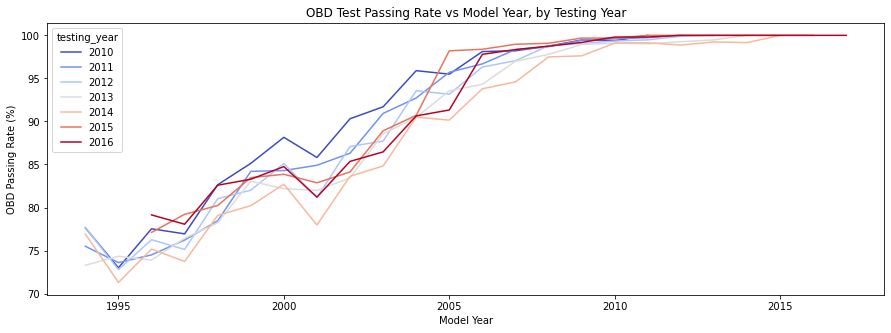

In [77]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor="white")
sns.lineplot(data=pass_rate_by_model_year_passed_obd_only_df, x='V_VEH_YEAR', y='Model_Year_OBD_Pass_Rate', hue="testing_year", palette="coolwarm")
plt.xlabel("Model Year")
plt.ylabel("OBD Passing Rate (%)")
plt.title("OBD Test Passing Rate vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_Model_Year_OBD_Pass.png')


In [2]:
#load data 

# pass_rate_by_model_year_IM240_df_2010=pass_rate_by_model_year(Data_2010_IM240_clean,2010,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2011=pass_rate_by_model_year(Data_2011_IM240_clean,2011,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2012=pass_rate_by_model_year(Data_2012_IM240_clean,2012,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2013=pass_rate_by_model_year(Data_2013_IM240_clean,2013,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2014=pass_rate_by_model_year(Data_2014_IM240_clean,2014,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2015=pass_rate_by_model_year(Data_2015_IM240_clean,2015,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2016=pass_rate_by_model_year(Data_2016_IM240_clean,2016,"IM240","V_EM_RES")

In [244]:
pass_rate_by_model_year_passed_IM240_only_df = [pass_rate_by_model_year_IM240_df_2010,pass_rate_by_model_year_IM240_df_2011,pass_rate_by_model_year_IM240_df_2012,pass_rate_by_model_year_IM240_df_2013,pass_rate_by_model_year_IM240_df_2014,pass_rate_by_model_year_IM240_df_2015,pass_rate_by_model_year_IM240_df_2016]
pass_rate_by_model_year_passed_IM240_only_df=pd.concat(pass_rate_by_model_year_passed_IM240_only_df)

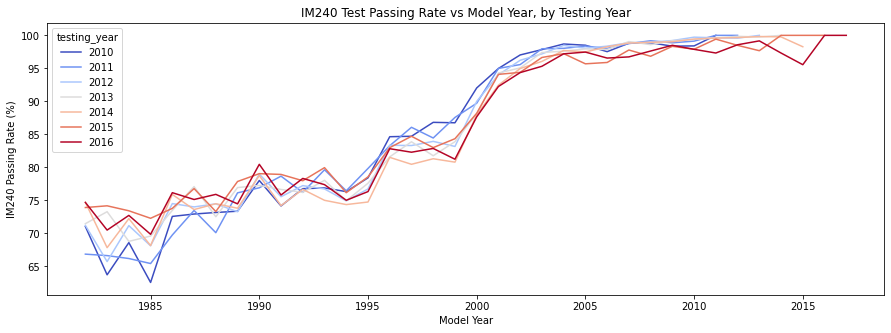

In [250]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor="white")
sns.lineplot(data=pass_rate_by_model_year_passed_IM240_only_df, x='V_VEH_YEAR', y='Model_Year_IM240_Pass_Rate', hue="testing_year", palette="coolwarm")
plt.xlabel("Model Year")
plt.ylabel("IM240 Passing Rate (%)")
plt.title("IM240 Test Passing Rate vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_Model_Year_IM240_Pass.png')


In [5]:
#load data

# pass_rate_by_model_year_both_pass_df_2010=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2010,2010,"both_tests")
# pass_rate_by_model_year_both_pass_df_2011=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2011,2011,"both_tests")
# pass_rate_by_model_year_both_pass_df_2013=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2013,2013,"both_tests")
# pass_rate_by_model_year_both_pass_df_2014=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2014,2014,"both_tests")
# pass_rate_by_model_year_both_pass_df_2015=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2015,2015,"both_tests")
# pass_rate_by_model_year_both_pass_df_2016=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2016,2016,"both_tests")

In [248]:
pass_rate_by_model_year_passed_both_tests_df = [pass_rate_by_model_year_both_pass_df_2010,pass_rate_by_model_year_both_pass_df_2011,pass_rate_by_model_year_both_pass_df_2013,pass_rate_by_model_year_both_pass_df_2014,pass_rate_by_model_year_both_pass_df_2015,pass_rate_by_model_year_both_pass_df_2016]
pass_rate_by_model_year_passed_both_tests_df=pd.concat(pass_rate_by_model_year_passed_both_tests_df)

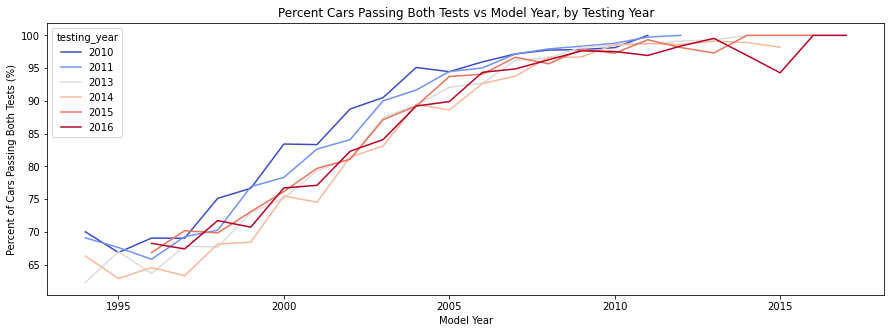

In [249]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor="white")
sns.lineplot(data=pass_rate_by_model_year_passed_both_tests_df, x='V_VEH_YEAR', y='Model_Year_both_tests_Pass_Rate', hue="testing_year", palette="coolwarm")
plt.xlabel("Model Year")
plt.ylabel("Percent of Cars Passing Both Tests (%)")
plt.title("Percent Cars Passing Both Tests vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_Model_Year_both_Pass.png')


In [189]:
def pass_rate_by_model_year_exactly_one_test(df,year,test):
    df["one_test_passed"]= (df["V_OBD_RES"]+df["V_EM_RES"]==1).astype(int)
    df = df[["V_VEH_YEAR", "one_test_passed"]].groupby(by="V_VEH_YEAR", axis=0).agg({"one_test_passed": ["count","sum"]})
    df.columns=df.columns.droplevel(0)
    df.rename(columns={"count": "Model_year_"+test+"_tests_conducted", "sum":"Model_year_"+test+"_passed_tests"}, inplace=True)
    df["Model_Year_"+test+"_Pass_Rate"] = 100*df["Model_year_"+test+"_passed_tests"]/df["Model_year_"+test+"_tests_conducted"]
    df["testing_year"]=year
    return df

In [6]:
# pass_rate_by_model_year_exactly_one_pass_df_2010=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2010,2010,"both_tests")
# pass_rate_by_model_year_exactly_one_pass_df_2011=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2011,2011,"both_tests")
# pass_rate_by_model_year_exactly_one_pass_df_2013=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2013,2013,"both_tests")
# pass_rate_by_model_year_exactly_one_pass_df_2014=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2014,2014,"both_tests")
# pass_rate_by_model_year_exactly_one_pass_df_2015=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2015,2015,"both_tests")
# pass_rate_by_model_year_exactly_one_pass_df_2016=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2016,2016,"both_tests")

In [ ]:
both_clean_data_frames_exactly_one_test_passed = [pass_rate_by_model_year_exactly_one_test,pass_rate_by_model_year_one_pass_df_2011,pass_rate_by_model_year_one_pass_df_2013,pass_rate_by_model_year_one_pass_df_2014,pass_rate_by_model_year_one_pass_df_2015,pass_rate_by_model_year_one_pass_df_2016]
both_clean_data_frames_exactly_one_test_passed=pd.concat(both_clean_data_frames_one_test_passed)

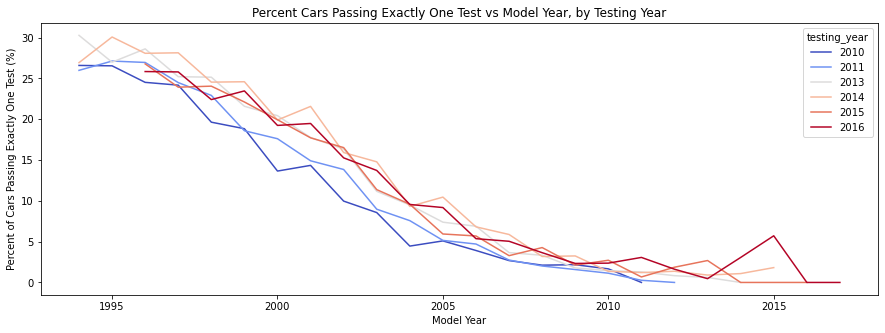

In [192]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor="white")
sns.lineplot(data=both_clean_data_frames_one_test_passed, x='V_VEH_YEAR', y='Model_Year_both_tests_Pass_Rate', hue="testing_year", palette="coolwarm")
plt.xlabel("Model Year")
plt.ylabel("Percent of Cars Passing Exactly One Test (%)")
plt.title("Percent Cars Passing Exactly One Test vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_Model_Year_both_Pass.png')


### ----Model Year Emission Analysis----

In [79]:
def model_year_pollution_degradation(df,year):
    df = df.drop_duplicates(subset=["V_VIN"], keep="first")
    df = df[["V_VIN","V_VEH_YEAR","V_CO", "V_HC","V_NOX"]].groupby(by=["V_VEH_YEAR"], axis=0).agg(V_CO_mean=("V_CO", "mean"),V_HC_mean=("V_HC", "mean"),V_NOX_mean=("V_NOX", "mean"))
    df["testing_year"]=year
    df.reset_index()
    return df

In [11]:
# model_year_pollution_2010_df=pd.read_csv("./model_year_pollution_2010_df.csv")
# model_year_pollution_2011_df=pd.read_csv("./model_year_pollution_2011_df.csv")
# model_year_pollution_2013_df=pd.read_csv("./model_year_pollution_2012_df.csv")
# model_year_pollution_2014_df=pd.read_csv("./model_year_pollution_2014_df.csv")
# model_year_pollution_2015_df=pd.read_csv("./model_year_pollution_2015_df.csv")
# model_year_pollution_2016_df=pd.read_csv("./model_year_pollution_2016_df.csv")

In [269]:
# model_year_pollution_dfs = [model_year_pollution_2010_df,model_year_pollution_2011_df,model_year_pollution_2013_df,model_year_pollution_2014_df,model_year_pollution_2015_df,model_year_pollution_2016_df]
# model_year_pollution_dfs_merged=pd.concat(model_year_pollution_dfs)

In [256]:
# model_year_pollution_dfs_merged.to_csv("./model_year_pollution_dfs_merged.csv")

In [12]:
model_year_pollution_dfs_merged=pd.read_csv("./model_year_pollution_dfs_merged.csv")

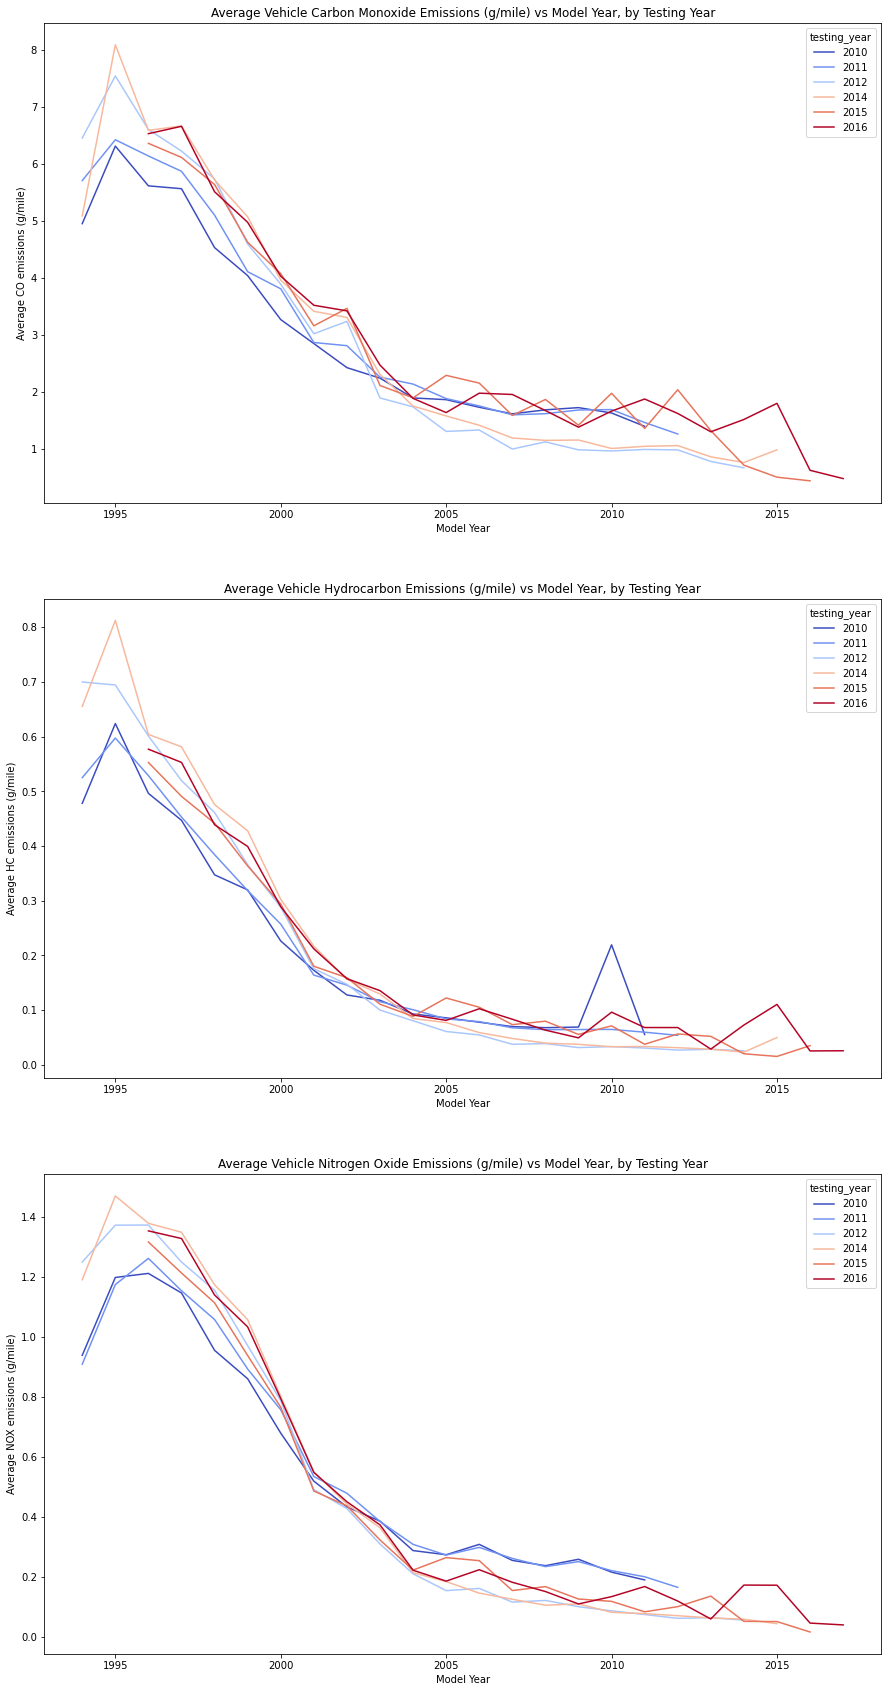

In [27]:
fig, ax = plt.subplots(3,1,figsize=(15, 30), facecolor="white")
sns.lineplot(data=model_year_pollution_dfs_merged, x='V_VEH_YEAR', y='V_CO_mean', hue="testing_year", palette="coolwarm",ax=ax[0])
ax[0].set_xlabel("Model Year")
ax[0].set_ylabel("Average CO emissions (g/mile)")
ax[0].set_title("Average Vehicle Carbon Monoxide Emissions (g/mile) vs Model Year, by Testing Year")
# plt.savefig('V_VEH_YEAR_vs_CO_mean.png')

sns.lineplot(data=model_year_pollution_dfs_merged, x='V_VEH_YEAR', y='V_HC_mean', hue="testing_year", palette="coolwarm",ax=ax[1])
ax[1].set_xlabel("Model Year")
ax[1].set_ylabel("Average HC emissions (g/mile)")
ax[1].set_title("Average Vehicle Hydrocarbon Emissions (g/mile) vs Model Year, by Testing Year")
# ax[1].savefig('V_VEH_YEAR_vs_HC_mean.png')

sns.lineplot(data=model_year_pollution_dfs_merged, x='V_VEH_YEAR', y='V_NOX_mean', hue="testing_year", palette="coolwarm",ax=ax[2])
ax[2].set_xlabel("Model Year")
ax[2].set_ylabel("Average NOX emissions (g/mile)")
ax[2].set_title("Average Vehicle Nitrogen Oxide Emissions (g/mile) vs Model Year, by Testing Year")
plt.savefig('Model_Year_vs_avg_Pollution.png')


## ----Analysis Part II: Pollution Control Analysis

### ----Pollution Control Degradation----

In [654]:
# def first_last_test(df,test_year):
#     first_tests_df = df.drop_duplicates(subset=["V_VIN"], keep="first")
#     last_tests_df = df.drop_duplicates(subset=["V_VIN"], keep="last")
#     print(len(first_tests_df),len(last_tests_df))
    
#     first_tests_df=first_tests_df[['V_VIN', 'V_DATE_TIME','V_MAKE', 'V_MODEL', 'V_VEH_YEAR', 'V_ODOMETER', 'V_CO', 'V_HC','V_NOX', 'V_EM_RES']]
#     last_tests_df=last_tests_df[['V_VIN', 'V_DATE_TIME','V_ODOMETER', 'V_CO', 'V_HC','V_NOX', 'V_EM_RES']]
    
#     first_tests_df.rename(columns={"V_CO": "V_CO_first", "V_HC": "V_HC_first","V_NOX": "V_NOX_first","V_DATETIME": "V_DATETIME_first", "V_ODOMETER":"V_ODOMETER_first", "V_EM_RES":"V_EM_RES_first"}, inplace=True)
#     last_tests_df.rename(columns={"V_CO": "V_CO_last", "V_HC": "V_HC_last","V_NOX": "V_NOX_last","V_DATETIME": "V_DATETIME_last", "V_ODOMETER":"V_ODOMETER_last", "V_EM_RES":"V_EM_RES_last"}, inplace=True)
    
#     final=first_tests_df.merge(last_tests_df,left_on="V_VIN", right_on="V_VIN")
#     final["testing_year"]=test_year
    
#     return final

In [704]:
#first_and_last_tests_2010.groupby("V_VEH_YEAR").agg({"V_VEH_YEAR":["count"],"V_CO_first":["mean"],"V_NOX_first":["mean"],"V_HC_first":["mean"]})

In [31]:
pollution_degradation_df=pd.read_csv("./Pollution_Degradation.csv")
pollution_degradation_df.head()

,V_VEH_YEAR,V_HC_first,V_HC_last,V_HC_diff,V_NOX_first,V_NOX_last,V_NOX_diff,V_CO_first,V_CO_last,V_CO_diff,testing_year
0,1995,1.028063,0.697158,0.330905,1.823751,1.500109,0.323642,10.416887,7.858637,2.558250,2016
1,1996,0.581134,0.409865,0.171269,1.341856,1.120653,0.221203,6.605968,5.172050,1.433918,2016
2,1997,0.558582,0.389551,0.169031,1.318695,1.097444,0.221250,6.712421,5.252400,1.460022,2016
3,1998,0.446639,0.307075,0.139564,1.143860,0.920586,0.223275,5.570534,4.388494,1.182040,2016
4,1999,0.410547,0.263880,0.146667,1.039107,0.773096,0.266012,5.095998,3.866872,1.229126,2016


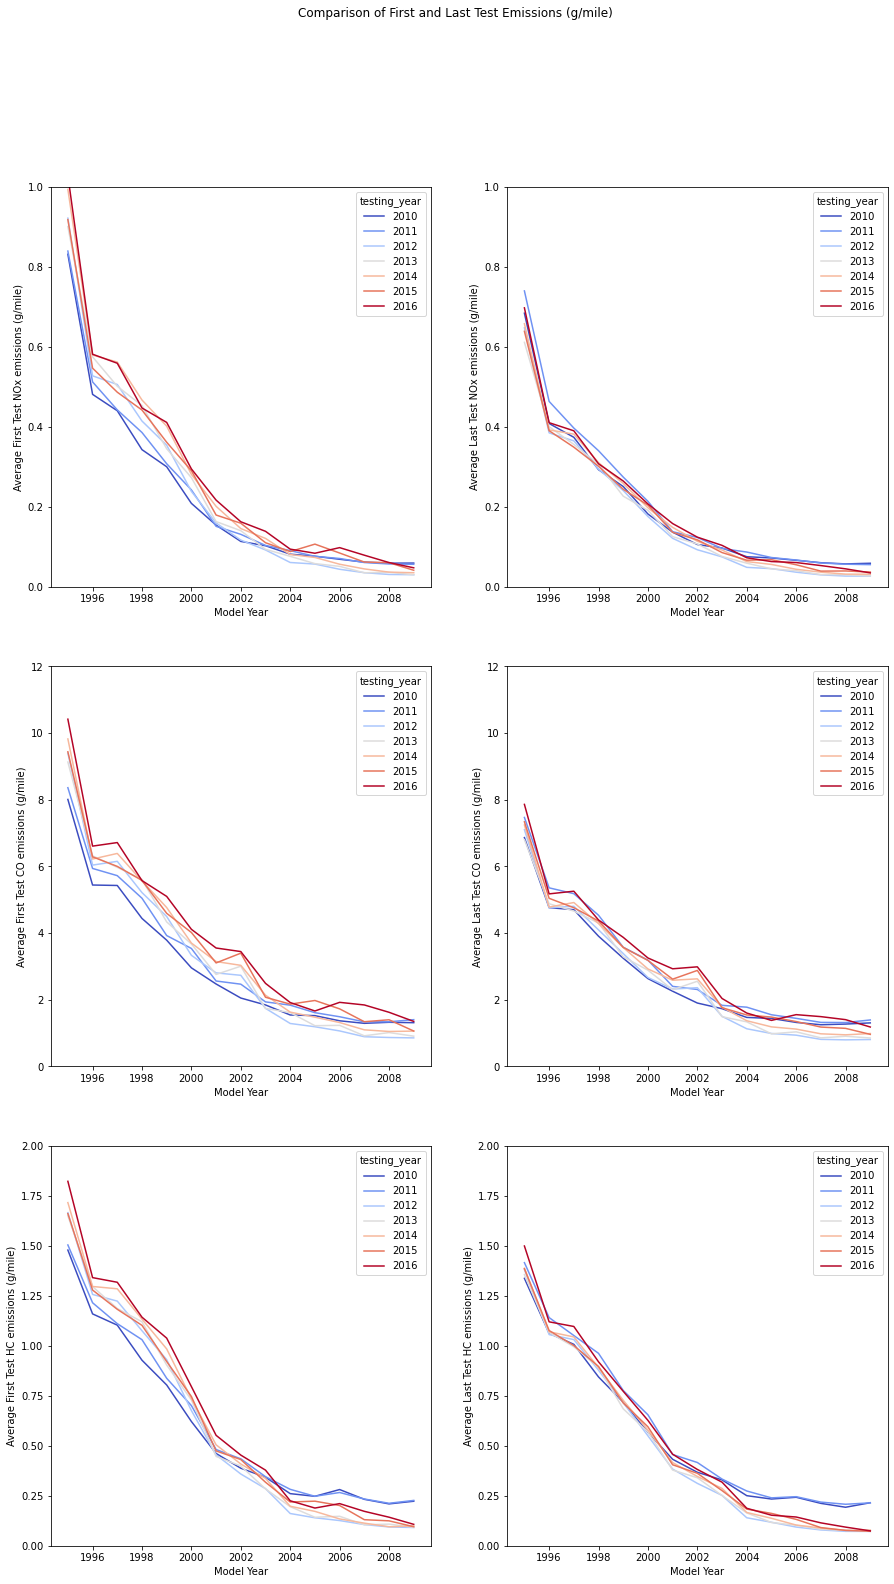

In [38]:
fig, ax = plt.subplots(3,2,figsize=(15, 25), facecolor="white")
fig.suptitle('Comparison of First and Last Test Emissions (g/mile)')

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_HC_first', hue="testing_year", palette="coolwarm",ax=ax[0][0])
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_HC_last', hue="testing_year", palette="coolwarm",ax=ax[0][1])
ax[0][0].set_ylim(0,1)
ax[0][1].set_ylim(0,1)
ax[0][0].set_xlabel("Model Year")
ax[0][0].set_ylabel("Average First Test NOx emissions (g/mile)")
ax[0][1].set_xlabel("Model Year")
ax[0][1].set_ylabel("Average Last Test NOx emissions (g/mile)")

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_CO_first', hue="testing_year", palette="coolwarm",ax=ax[1][0])
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_CO_last', hue="testing_year", palette="coolwarm",ax=ax[1][1])
ax[1][0].set_ylim(0,12)
ax[1][1].set_ylim(0,12)
ax[1][0].set_xlabel("Model Year")
ax[1][0].set_ylabel("Average First Test CO emissions (g/mile)")
ax[1][1].set_xlabel("Model Year")
ax[1][1].set_ylabel("Average Last Test CO emissions (g/mile)")

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_NOX_first', hue="testing_year", palette="coolwarm",ax=ax[2][0])
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_NOX_last', hue="testing_year", palette="coolwarm",ax=ax[2][1])
ax[2][0].set_ylim(0,2)
ax[2][1].set_ylim(0,2)
ax[2][0].set_xlabel("Model Year")
ax[2][0].set_ylabel("Average First Test HC emissions (g/mile)")
ax[2][1].set_xlabel("Model Year")
ax[2][1].set_ylabel("Average Last Test HC emissions (g/mile)")

plt.savefig('First_and_Last_Test_Comparisons.png')



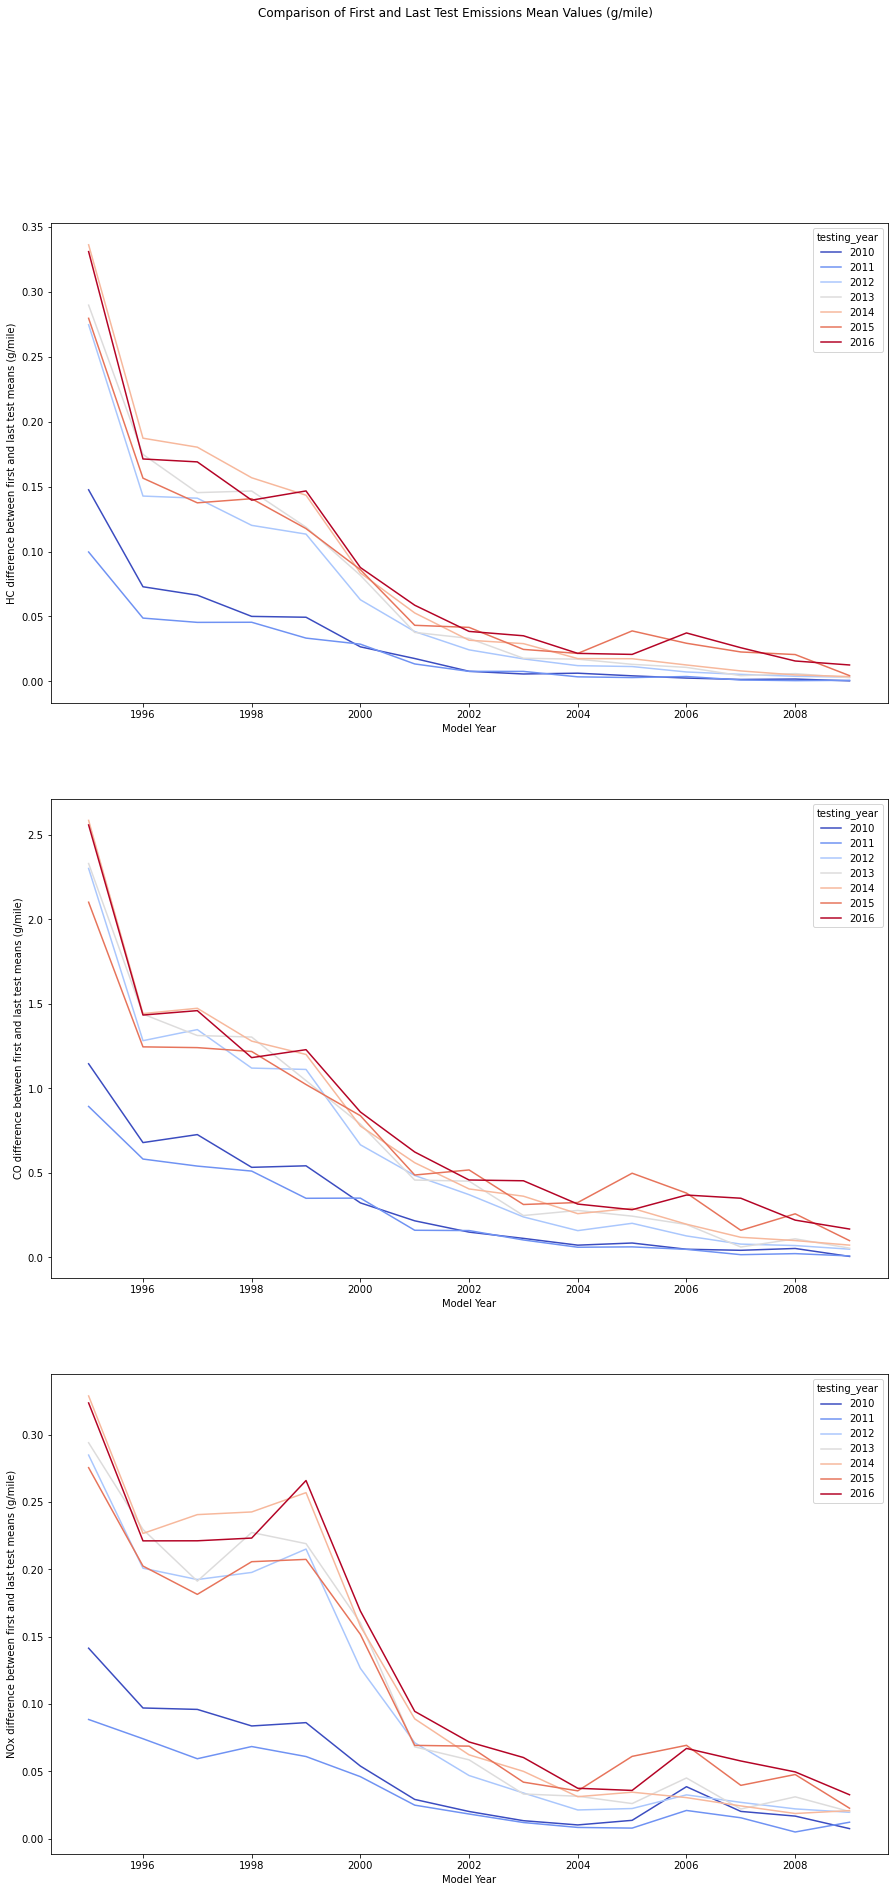

In [41]:
fig, ax = plt.subplots(3,1,figsize=(15, 30), facecolor="white")
fig.suptitle('Comparison of First and Last Test Emissions Mean Values (g/mile)')

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_HC_diff', hue="testing_year", palette="coolwarm",ax=ax[0])
ax[0].set_xlabel("Model Year")
ax[0].set_ylabel("HC difference between first and last test means (g/mile)")

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_CO_diff', hue="testing_year", palette="coolwarm",ax=ax[1])
ax[1].set_xlabel("Model Year")
ax[1].set_ylabel("CO difference between first and last test means (g/mile)")

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_NOX_diff', hue="testing_year", palette="coolwarm",ax=ax[2])
ax[2].set_xlabel("Model Year")
ax[2].set_ylabel("NOx difference between first and last test means (g/mile)")

plt.savefig('Difference_Bewteen_first_and_last_test_means.png')

### ----Pollutants Saved----

In [ ]:
# theoretical_pollutants_saved_df_2010 = pd.read_csv("./theoretical_pollutants_saved_df_2010.csv")
# theoretical_pollutants_saved_df_2011 = pd.read_csv("./theoretical_pollutants_saved_df_2011.csv")
# theoretical_pollutants_saved_df_2012 = pd.read_csv("./theoretical_pollutants_saved_df_2012.csv")
# theoretical_pollutants_saved_df_2013 = pd.read_csv("./theoretical_pollutants_saved_df_2013.csv")
# theoretical_pollutants_saved_df_2014 = pd.read_csv("./theoretical_pollutants_saved_df_2014.csv")
# theoretical_pollutants_saved_df_2015 = pd.read_csv("./theoretical_pollutants_saved_df_2015.csv")
# theoretical_pollutants_saved_df_2016 = pd.read_csv("./theoretical_pollutants_saved_df_2016.csv")

In [ ]:
theoretical_pollutants_dfs=[theoretical_pollutants_saved_df_2010,theoretical_pollutants_saved_df_2011,theoretical_pollutants_saved_df_2012,theoretical_pollutants_saved_df_2013,theoretical_pollutants_saved_df_2014,theoretical_pollutants_saved_df_2015,theoretical_pollutants_saved_df_2016]
theoretical_pollutants_dfs_merged=pd.concat(theoretical_pollutants_dfs)
theoretical_pollutants_dfs

|Testing Year	|Theoretical HC Saved (tonnes)|	Theoretical CO Saved (tonnes)|	Theoretical NOX Saved (tonnes)|
|---|---|---|---|	
|2010|	360|	3970|	350|
|2011|	291|	3674|	278|
|2012|	609|	6816|	666|
|2013|	569|	6316|	663|
|2014|	538|	5799|	625|
|2015|	424|	4734|	451|
|2016|	399|	4465|	466|


## Future Work
- OBD and IM240 confusion/impact
- paired t test for mean difference first/last test
- mini vin analysis